# Translator Bahasa Isyarat

Library yang digunakan :
1. SpeechRecognition
2. Numpy
3. wave
4. scipy

Eh ini library" yg kalian pake coba list d sini, buat dokumentasi d github ny nti


Menginstall modul dan library yang dibutuhkan

In [ ]:
!pip install SpeechRecognition ffmpeg-python
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
# !pip install pyAudio 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 138 kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 5 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-

In [ ]:
import numpy as np

import speech_recognition as sr
import wave
import scipy
# import pyaudio

In [ ]:
sr.__version__

'3.8.1'

## Test mic
[source](https://colab.research.google.com/drive/1Z6VIRZ_sX314hyev3Gm5gBqvm1wQVo-a#scrollTo=xuKJ4wBU6gxx)

In [ ]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [ ]:
audio, srec = get_audio()

In [ ]:
scipy.io.wavfile.write('test.wav', srec, audio)

In [ ]:
r = sr.Recognizer()

In [ ]:
data_path='/content/test.wav'
harvard = sr.AudioFile(data_path)
with harvard as source:
  audio = r.record(source)

In [ ]:
r.recognize_google(audio, language='id-ID')

'Ngawi ayo'

In [ ]:
def rec_and_conv():
  audio, srec = get_audio()
  scipy.io.wavfile.write('test.wav', srec, audio)
  r = sr.Recognizer()
  harvard = sr.AudioFile('/content/test.wav')
  with harvard as source:
    audio = r.record(source)
  print("Result : ", r.recognize_google(audio, language='id-ID'))

In [ ]:
rec_and_conv()

Result :  tes tes tes 123


In [ ]:
# !wget https://pmpk.kemdikbud.go.id/sibi/SIBI/katadasar/Acuh.webm

## Convert audio

In [ ]:
from google.colab import files
files=files.upload()

In [ ]:
# filename = list(files.keys())[0]
filename = '/content/test.wav'
filename

'/content/test.wav'

In [ ]:
!pip install pydub
!apt-get install ffmpeg libavcodec-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
libavcodec-extra is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [ ]:
from pydub import AudioSegment
song = AudioSegment.from_file(filename, "mp4")
song.export("out.wav", format="wav") # ubah-ubah di sini outputnya

<_io.BufferedRandom name='out.wav'>

In [ ]:
data_path='/content/out.wav'
test = sr.AudioFile(data_path)
with test as source:
  audio = r.record(source)
result = r.recognize_google(audio, language='id-ID')
print("Result : ", result)

Result :  tes tes tes 123


## Tampilin Gambar

In [ ]:
result

'tes tes tes 123'

In [ ]:
result = result.split(' ')

In [ ]:
result

['tes', 'tes', 'tes', '123']

In [ ]:
# def show_all_img(list_result):
    

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
query = 'k'

In [ ]:
path = '/content/gdrive/Shareddrives/C22-039/Sign Languages/Alphabet-img/' + query + '.jpg'

In [ ]:
img = mpimg.imread(path)

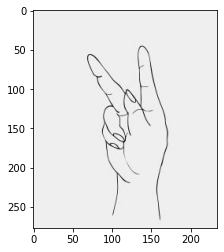

In [ ]:
imgplot = plt.imshow(img)

In [ ]:
def show_img(query):
  path = '/content/gdrive/Shareddrives/C22-039/Sign Languages/Alphabet-img/' + query + '.jpg'
  img = mpimg.imread(path)
  plt.figure()
  plt.imshow(img)

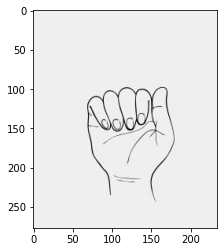

In [ ]:
show_img('a')

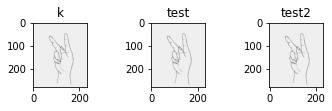

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(3,3,1)
ax.set_title(query)
imgplot = plt.imshow(img)
ax = fig.add_subplot(3,3,2)
ax.set_title('test')
imgplot = plt.imshow(img)
ax = fig.add_subplot(3,3,3)
ax.set_title('test2')
imgplot = plt.imshow(img)

### GIF gambar alfabet

In [ ]:
!pip install plotnine
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import pandas as pd
import imageio
import numpy as np
from plotnine import *   # plotting
from google.colab import files   # file download

In [56]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [57]:
path = '/content/gdrive/Shareddrives/C22-039/Sign Languages/Alphabet-img/'
name_list = ['v', 'i', 'a']

In [58]:
images = list()
for x in name_list:
  images.append(imageio.imread(path + str(x) + '.jpg'))
imageio.mimsave("name.gif", images, duration=1)

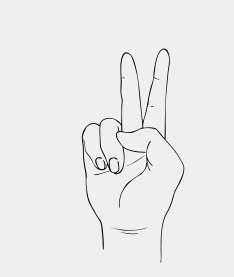

In [59]:
from IPython.display import Image
Image(open('/content/name.gif', 'rb').read())

# Alphabet Recognition

Library yang digunakan:
1. Mediapipe = untuk mendeteksi bentuk tangan
2. OpenCV/CV2 = untuk mengelola gambar/video yang di-input
3. pyplot, numpy, pandas
4. tensorflow = library untuk membantu dalam pembuatan model

In [61]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "update"


In [63]:
# upload file kaggle.json agar bisa mengunduh dataset dari kaggle

from google.colab import files

uploaded = files.upload() 

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [64]:
!kaggle datasets download -d mlanangafkaar/datasets-lemlitbang-sibi-alphabets

 99% 1.74G/1.75G [00:11<00:00, 219MB/s]
100% 1.75G/1.75G [00:11<00:00, 162MB/s]


In [65]:
!unzip "datasets-lemlitbang-sibi-alphabets.zip"

Archive:  datasets-lemlitbang-sibi-alphabets.zip
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/desktop.ini  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/A (4).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/B (4).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/C (2).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/D (3).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/E (2).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/F (3).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/G (3).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI

In [66]:
# import library yang dibutuhkan

import pandas as pd
import numpy as np
import tensorflow as tf
import mediapipe as mp
import os
import csv
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import to_categorical

In [67]:
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

# Checking Tensorflow Version
tf.__version__

'2.9.2'

In [68]:
# Function to Extract Feature from images or Frame
def extract_feature(input_image):
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils 
    image = cv.imread(input_image)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.1) as hands:
        while True:
            # flip gambar serta mengubah BGR menjadi RGB 
            results = hands.process(cv.flip(cv.cvtColor(image, cv.COLOR_BGR2RGB), 1))
            image_height, image_width, _ = image.shape
            # Print handedness (left v.s. right hand).
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Handedness of {input_image}:')
            #print(results.multi_handedness)

            # Draw hand landmarks of each hand.
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Hand landmarks of {input_image}:')
            if not results.multi_hand_landmarks:
                # Here we will set whole landmarks into zero as no handpose detected
                # in a picture wanted to extract.
                
                # Wrist Hand
                wristX = 0
                wristY = 0
                wristZ = 0
                
                # Thumb Finger
                thumb_CmcX = 0
                thumb_CmcY = 0
                thumb_CmcZ = 0
                
                thumb_McpX = 0
                thumb_McpY = 0
                thumb_McpZ = 0
                
                thumb_IpX = 0
                thumb_IpY = 0
                thumb_IpZ = 0
                
                thumb_TipX = 0
                thumb_TipY = 0
                thumb_TipZ = 0

                # Index Finger
                index_McpX = 0
                index_McpY = 0
                index_McpZ = 0
                
                index_PipX = 0
                index_PipY = 0
                index_PipZ = 0
                
                index_DipX = 0
                index_DipY = 0
                index_DipZ = 0
                
                index_TipX = 0
                index_TipY = 0
                index_TipZ = 0

                # Middle Finger
                middle_McpX = 0
                middle_McpY = 0
                middle_McpZ = 0
                
                middle_PipX = 0
                middle_PipY = 0
                middle_PipZ = 0
                
                middle_DipX = 0
                middle_DipY = 0
                middle_DipZ = 0
                
                middle_TipX = 0
                middle_TipY = 0
                middle_TipZ = 0

                # Ring Finger
                ring_McpX = 0
                ring_McpY = 0
                ring_McpZ = 0
                
                ring_PipX = 0
                ring_PipY = 0
                ring_PipZ = 0
                
                ring_DipX = 0
                ring_DipY = 0
                ring_DipZ = 0
                
                ring_TipX = 0
                ring_TipY = 0
                ring_TipZ = 0

                # Pinky Finger
                pinky_McpX = 0
                pinky_McpY = 0
                pinky_McpZ = 0
                
                pinky_PipX = 0
                pinky_PipY = 0
                pinky_PipZ = 0
                
                pinky_DipX = 0
                pinky_DipY = 0
                pinky_DipZ = 0
                
                pinky_TipX = 0
                pinky_TipY = 0
                pinky_TipZ = 0
                
                # Set image to Zero
                annotated_image = 0

                # Return Whole Landmark and Image
                return (wristX, wristY, wristZ,
                        thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                        thumb_McpX, thumb_McpY, thumb_McpZ,
                        thumb_IpX, thumb_IpY, thumb_IpZ,
                        thumb_TipX, thumb_TipY, thumb_TipZ,
                        index_McpX, index_McpY, index_McpZ,
                        index_PipX, index_PipY, index_PipZ,
                        index_DipX, index_DipY, index_DipZ,
                        index_TipX, index_TipY, index_TipZ,
                        middle_McpX, middle_McpY, middle_McpZ,
                        middle_PipX, middle_PipY, middle_PipZ,
                        middle_DipX, middle_DipY, middle_DipZ,
                        middle_TipX, middle_TipY, middle_TipZ,
                        ring_McpX, ring_McpY, ring_McpZ,
                        ring_PipX, ring_PipY, ring_PipZ,
                        ring_DipX, ring_DipY, ring_DipZ,
                        ring_TipX, ring_TipY, ring_TipZ,
                        pinky_McpX, pinky_McpY, pinky_McpZ,
                        pinky_PipX, pinky_PipY, pinky_PipZ,
                        pinky_DipX, pinky_DipY, pinky_DipZ,
                        pinky_TipX, pinky_TipY, pinky_TipZ,
                        annotated_image)
            
            annotated_image = cv.flip(image.copy(), 1)
            for hand_landmarks in results.multi_hand_landmarks:
                # Wrist Hand /  Pergelangan Tangan
                wristX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
                wristY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
                wristZ = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z

                # Thumb Finger / Ibu Jari
                thumb_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
                thumb_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
                thumb_CmcZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].z
                
                thumb_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
                thumb_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
                thumb_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].z
                
                thumb_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
                thumb_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
                thumb_IpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].z
                
                thumb_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                thumb_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
                thumb_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].z

                # Index Finger / Jari Telunjuk
                index_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
                index_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
                index_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z
                
                index_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
                index_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
                index_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z
                
                index_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
                index_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
                index_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].z
                
                index_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                index_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
                index_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].z

                # Middle Finger / Jari Tengah
                middle_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
                middle_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
                middle_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].z
                
                middle_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
                middle_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
                middle_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].z
                
                middle_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
                middle_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
                middle_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].z
                
                middle_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                middle_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
                middle_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].z

                # Ring Finger / Jari Cincin
                ring_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
                ring_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
                ring_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].z
                
                ring_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
                ring_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
                ring_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].z
                
                ring_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
                ring_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
                ring_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].z
                
                ring_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                ring_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
                ring_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].z

                # Pinky Finger / Jari Kelingking
                pinky_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
                pinky_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
                pinky_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].z
                
                pinky_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
                pinky_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
                pinky_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].z
                
                pinky_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
                pinky_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
                pinky_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].z
                
                pinky_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                pinky_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
                pinky_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].z

                # Draw the Skeleton
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                
            return (wristX, wristY, wristZ,
                    thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                    thumb_McpX, thumb_McpY, thumb_McpZ,
                    thumb_IpX, thumb_IpY, thumb_IpZ,
                    thumb_TipX, thumb_TipY, thumb_TipZ,
                    index_McpX, index_McpY, index_McpZ,
                    index_PipX, index_PipY, index_PipZ,
                    index_DipX, index_DipY, index_DipZ,
                    index_TipX, index_TipY, index_TipZ,
                    middle_McpX, middle_McpY, middle_McpZ,
                    middle_PipX, middle_PipY, middle_PipZ,
                    middle_DipX, middle_DipY, middle_DipZ,
                    middle_TipX, middle_TipY, middle_TipZ,
                    ring_McpX, ring_McpY, ring_McpZ,
                    ring_PipX, ring_PipY, ring_PipZ,
                    ring_DipX, ring_DipY, ring_DipZ,
                    ring_TipX, ring_TipY, ring_TipZ,
                    pinky_McpX, pinky_McpY, pinky_McpZ,
                    pinky_PipX, pinky_PipY, pinky_PipZ,
                    pinky_DipX, pinky_DipY, pinky_DipZ,
                    pinky_TipX, pinky_TipY, pinky_TipZ,
                    annotated_image)

In [69]:
#Function to create CSV file or add dataset to the existed CSV file
def toCSV(filecsv, class_type,
          wristX, wristY, wristZ,
          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
          thumb_McpX, thumb_McpY, thumb_McpZ,
          thumb_IpX, thumb_IpY, thumb_IpZ,
          thumb_TipX, thumb_TipY, thumb_TipZ,
          index_McpX, index_McpY, index_McpZ,
          index_PipX, index_PipY, index_PipZ,
          index_DipX, index_DipY, index_DipZ,
          index_TipX, index_TipY, index_TipZ,
          middle_McpX, middle_McpY, middle_McpZ,
          middle_PipX, middle_PipY, middle_PipZ,
          middle_DipX, middle_DipY, middle_DipZ,
          middle_TipX, middle_TipY, middle_TipZ,
          ring_McpX, ring_McpY, ring_McpZ,
          ring_PipX, ring_PipY, ring_PipZ,
          ring_DipX, ring_DipY, ring_DipZ,
          ring_TipX, ring_TipY, ring_TipZ,
          pinky_McpX, pinky_McpY, pinky_McpZ,
          pinky_PipX, pinky_PipY, pinky_PipZ,
          pinky_DipX, pinky_DipY, pinky_DipZ,
          pinky_TipX, pinky_TipY, pinky_TipZ):
    if os.path.isfile(filecsv):
        #print ("File exist thus shall write append to the file")
        with open(filecsv, 'a+', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow([class_type,
                             wristX, wristY, wristZ,
                             thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                             thumb_McpX, thumb_McpY, thumb_McpZ,
                             thumb_IpX, thumb_IpY, thumb_IpZ,
                             thumb_TipX, thumb_TipY, thumb_TipZ,
                             index_McpX, index_McpY, index_McpZ,
                             index_PipX, index_PipY, index_PipZ,
                             index_DipX, index_DipY, index_DipZ,
                             index_TipX, index_TipY, index_TipZ,
                             middle_McpX, middle_McpY, middle_McpZ,
                             middle_PipX, middle_PipY, middle_PipZ,
                             middle_DipX, middle_DipY, middle_DipZ,
                             middle_TipX, middle_TipY, middle_TipZ,
                             ring_McpX, ring_McpY, ring_McpZ,
                             ring_PipX, ring_PipY, ring_PipZ,
                             ring_DipX, ring_DipY, ring_DipZ,
                             ring_TipX, ring_TipY, ring_TipZ,
                             pinky_McpX, pinky_McpY, pinky_McpZ,
                             pinky_PipX, pinky_PipY, pinky_PipZ,
                             pinky_DipX, pinky_DipY, pinky_DipZ,
                             pinky_TipX, pinky_TipY, pinky_TipZ])
    else:
        #print ("File not exist thus shall create new file as", filecsv)
        with open(filecsv, 'w', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow(["class_type",
                             "wristX", "wristY", "wristZ",
                             "thumb_CmcX", "thumb_CmcY", "thumb_CmcZ",
                             "thumb_McpX", "thumb_McpY", "thumb_McpZ",
                             "thumb_IpX", "thumb_IpY", "thumb_IpZ",
                             "thumb_TipX", "thumb_TipY", "thumb_TipZ",
                             "index_McpX", "index_McpY", "index_McpZ",
                             "index_PipX", "index_PipY", "index_PipZ",
                             "index_DipX", "index_DipY", "index_DipZ",
                             "index_TipX", "index_TipY", "index_TipZ",
                             "middle_McpX", "middle_McpY", "middle_McpZ",
                             "middle_PipX", "middle_PipY", "middle_PipZ",
                             "middle_DipX", "middle_DipY", "middle_DipZ",
                             "middle_TipX", "middle_TipY", "middle_TipZ",
                             "ring_McpX", "ring_McpY", "ring_McpZ",
                             "ring_PipX", "ring_PipY", "ring_PipZ",
                             "ring_DipX", "ring_DipY", "ring_DipZ",
                             "ring_TipX", "ring_TipY", "ring_TipZ",
                             "pinky_McpX", "pinky_McpY", "pinky_McpZ",
                             "pinky_PipX", "pinky_PipY", "pinky_PipZ",
                             "pinky_DipX", "pinky_DipY", "pinky_DipZ",
                             "pinky_TipX", "pinky_TipY", "pinky_TipZ"])
            writer.writerow([class_type,
                             wristX, wristY, wristZ,
                             thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                             thumb_McpX, thumb_McpY, thumb_McpZ,
                             thumb_IpX, thumb_IpY, thumb_IpZ,
                             thumb_TipX, thumb_TipY, thumb_TipZ,
                             index_McpX, index_McpY, index_McpZ,
                             index_PipX, index_PipY, index_PipZ,
                             index_DipX, index_DipY, index_DipZ,
                             index_TipX, index_TipY, index_TipZ,
                             middle_McpX, middle_McpY, middle_McpZ,
                             middle_PipX, middle_PipY, middle_PipZ,
                             middle_DipX, middle_DipY, middle_DipZ,
                             middle_TipX, middle_TipY, middle_TipZ,
                             ring_McpX, ring_McpY, ring_McpZ,
                             ring_PipX, ring_PipY, ring_PipZ,
                             ring_DipX, ring_DipY, ring_DipZ,
                             ring_TipX, ring_TipY, ring_TipZ,
                             pinky_McpX, pinky_McpY, pinky_McpZ,
                             pinky_PipX, pinky_PipY, pinky_PipZ,
                             pinky_DipX, pinky_DipY, pinky_DipZ,
                             pinky_TipX, pinky_TipY, pinky_TipZ])

In [70]:
# Extract Feature for Training
# using SIBI datasets version V02
paths = "/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/"
csv_path = "hands_SIBI_training.csv"

if os.path.exists(csv_path):
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")
    
for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                
                (wristX, wristY, wristZ,
                 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                 thumb_McpX, thumb_McpY, thumb_McpZ,
                 thumb_IpX, thumb_IpY, thumb_IpZ,
                 thumb_TipX, thumb_TipY, thumb_TipZ,
                 index_McpX, index_McpY, index_McpZ,
                 index_PipX, index_PipY, index_PipZ,
                 index_DipX, index_DipY, index_DipZ,
                 index_TipX, index_TipY, index_TipZ,
                 middle_McpX, middle_McpY, middle_McpZ,
                 middle_PipX, middle_PipY, middle_PipZ,
                 middle_DipX, middle_DipY, middle_DipZ,
                 middle_TipX, middle_TipY, middle_TipZ,
                 ring_McpX, ring_McpY, ring_McpZ,
                 ring_PipX, ring_PipY, ring_PipZ,
                 ring_DipX, ring_DipY, ring_DipZ,
                 ring_TipX, ring_TipY, ring_TipZ,
                 pinky_McpX, pinky_McpY, pinky_McpZ,
                 pinky_PipX, pinky_PipY, pinky_PipZ,
                 pinky_DipX, pinky_DipY, pinky_DipZ,
                 pinky_TipX, pinky_TipY, pinky_TipZ,
                 annotated_image) = extract_feature(os.path.join(root, filename))
            
                if ((not wristX == 0) and (not wristY == 0)):
                    toCSV(csv_path, dirlist, 
                          wristX, wristY, wristZ,
                          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                          thumb_McpX, thumb_McpY, thumb_McpZ,
                          thumb_IpX, thumb_IpY, thumb_IpZ,
                          thumb_TipX, thumb_TipY, thumb_TipZ,
                          index_McpX, index_McpY, index_McpZ,
                          index_PipX, index_PipY, index_PipZ,
                          index_DipX, index_DipY, index_DipZ,
                          index_TipX, index_TipY, index_TipZ,
                          middle_McpX, middle_McpY, middle_McpZ,
                          middle_PipX, middle_PipY, middle_PipZ,
                          middle_DipX, middle_DipY, middle_DipZ,
                          middle_TipX, middle_TipY, middle_TipZ,
                          ring_McpX, ring_McpY, ring_McpZ,
                          ring_PipX, ring_PipY, ring_PipZ,
                          ring_DipX, ring_DipY, ring_DipZ,
                          ring_TipX, ring_TipY, ring_TipZ,
                          pinky_McpX, pinky_McpY, pinky_McpZ,
                          pinky_PipX, pinky_PipY, pinky_PipZ,
                          pinky_DipX, pinky_DipY, pinky_DipZ,
                          pinky_TipX, pinky_TipY, pinky_TipZ,)
                
                else :
                    print(os.path.join(root, filename), "Hand does not have landmarks")

print("===================Feature Extraction for TRAINING is Completed===================")

The CSV file does not exist hands_SIBI_training.csv ,Going Create after Extraction
Inside Folder X Consist : 42 Imageset
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/X/IMG_20210605_174251.jpg Hand does not have landmarks
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/X/A5E3251E-E429-4487-8EAD-55B7198884CD.jpg Hand does not have landmarks
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/X/B012C360-2B48-4F35-98D6-ADF107F6508F.jpg Hand does not have landmarks
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/X/IMG_20210606_203352.jpg Hand does not have landmarks
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/X/1243756F-A4C6-4419-8773-4503E0B0A7D6.jpg Hand does not have landmarks
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90

In [71]:
# Extract Feature for Validation
# using SIBI datasets version V02
paths = "/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation/"
csv_path = "hands_SIBI_validation.csv"

if os.path.exists(csv_path):
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")
    
for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                (wristX, wristY, wristZ,
                 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                 thumb_McpX, thumb_McpY, thumb_McpZ,
                 thumb_IpX, thumb_IpY, thumb_IpZ,
                 thumb_TipX, thumb_TipY, thumb_TipZ,
                 index_McpX, index_McpY, index_McpZ,
                 index_PipX, index_PipY, index_PipZ,
                 index_DipX, index_DipY, index_DipZ,
                 index_TipX, index_TipY, index_TipZ,
                 middle_McpX, middle_McpY, middle_McpZ,
                 middle_PipX, middle_PipY, middle_PipZ,
                 middle_DipX, middle_DipY, middle_DipZ,
                 middle_TipX, middle_TipY, middle_TipZ,
                 ring_McpX, ring_McpY, ring_McpZ,
                 ring_PipX, ring_PipY, ring_PipZ,
                 ring_DipX, ring_DipY, ring_DipZ,
                 ring_TipX, ring_TipY, ring_TipZ,
                 pinky_McpX, pinky_McpY, pinky_McpZ,
                 pinky_PipX, pinky_PipY, pinky_PipZ,
                 pinky_DipX, pinky_DipY, pinky_DipZ,
                 pinky_TipX, pinky_TipY, pinky_TipZ,
                 annotated_image) = extract_feature(os.path.join(root, filename))
            
                if ((not wristX == 0) and (not wristY == 0)):
                    toCSV(csv_path, dirlist, 
                          wristX, wristY, wristZ,
                          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                          thumb_McpX, thumb_McpY, thumb_McpZ,
                          thumb_IpX, thumb_IpY, thumb_IpZ,
                          thumb_TipX, thumb_TipY, thumb_TipZ,
                          index_McpX, index_McpY, index_McpZ,
                          index_PipX, index_PipY, index_PipZ,
                          index_DipX, index_DipY, index_DipZ,
                          index_TipX, index_TipY, index_TipZ,
                          middle_McpX, middle_McpY, middle_McpZ,
                          middle_PipX, middle_PipY, middle_PipZ,
                          middle_DipX, middle_DipY, middle_DipZ,
                          middle_TipX, middle_TipY, middle_TipZ,
                          ring_McpX, ring_McpY, ring_McpZ,
                          ring_PipX, ring_PipY, ring_PipZ,
                          ring_DipX, ring_DipY, ring_DipZ,
                          ring_TipX, ring_TipY, ring_TipZ,
                          pinky_McpX, pinky_McpY, pinky_McpZ,
                          pinky_PipX, pinky_PipY, pinky_PipZ,
                          pinky_DipX, pinky_DipY, pinky_DipZ,
                          pinky_TipX, pinky_TipY, pinky_TipZ,)
                
                else :
                    print(os.path.join(root, filename), "Hand does not have landmarks")
                
print("===================Feature Extraction for VALIDATION is Completed===================")

The CSV file does not exist hands_SIBI_validation.csv ,Going Create after Extraction
Inside Folder X Consist : 9 Imageset
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation/X/D387A9E7-6E91-447D-95C5-637E45855DFD.jpg Hand does not have landmarks
Inside Folder J Consist : 9 Imageset
Inside Folder B Consist : 10 Imageset
Inside Folder O Consist : 10 Imageset
Inside Folder K Consist : 10 Imageset
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation/K/IMG_20210605_172855.jpg Hand does not have landmarks
Inside Folder Y Consist : 9 Imageset
Inside Folder U Consist : 9 Imageset
Inside Folder T Consist : 9 Imageset
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation/T/IMG_20210605_174017.jpg Hand does not have landmarks
Inside Folder P Consist : 9 Imageset
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90

In [81]:
# Read CSV file for Training the model using Pandas
df_train = pd.read_csv("hands_SIBI_training.csv", header=0)

# First we must sort the values of the dataset according to the Alphabets
df_train = df_train.sort_values(by=["class_type"])

df_train

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
894,A,640.974283,1024.755556,-1.163733e-06,567.885652,1006.963102,-0.013956,507.874623,935.403753,-0.011035,...,-0.023877,643.815994,825.428450,-0.040151,637.993008,872.448224,-0.016822,648.239538,891.358387,0.007505
918,A,991.833150,1419.435740,-1.660239e-06,722.890615,1192.453384,-0.058596,565.281630,860.899925,-0.085598,...,-0.045381,1384.798646,753.047466,-0.090443,1298.229337,927.276254,-0.059622,1282.797098,993.771076,-0.022252
919,A,970.423996,1656.446457,-1.741665e-06,735.988379,1360.880375,-0.077002,690.559149,943.802476,-0.093150,...,-0.008033,1525.999308,1004.472852,-0.070069,1371.982455,1176.845074,-0.044239,1304.731488,1223.730087,-0.006655
920,A,1180.095911,1496.081114,-1.297040e-06,954.192042,1328.432918,-0.066053,815.867484,1072.104931,-0.092898,...,-0.022217,1473.801494,868.545830,-0.065886,1412.814140,1027.331829,-0.043371,1369.605660,1062.549233,-0.013358
921,A,1039.398780,2205.790077,-2.197635e-06,672.863012,2131.139660,-0.086442,375.707852,1791.240177,-0.126042,...,-0.138461,1187.238596,1450.590900,-0.215664,1122.937619,1699.021545,-0.173201,1150.677092,1739.713337,-0.121712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,Z,667.591870,1401.824355,7.016522e-07,703.145564,1387.711048,-0.192037,879.243493,1374.056697,-0.251065,...,0.000910,1282.711148,1337.733626,-0.075556,1164.786220,1415.526152,-0.079853,1077.950358,1378.503561,-0.062036
583,Z,978.258835,1808.682939,1.032698e-06,945.240106,1858.198865,-0.115406,1007.911550,1893.381226,-0.177525,...,-0.064541,1375.261356,1773.544798,-0.110864,1278.846965,1821.096928,-0.110270,1192.650727,1793.069757,-0.099451
585,Z,1671.174986,2387.635551,-5.264958e-08,1636.857611,2319.269085,-0.041832,1638.307248,2196.292751,-0.067179,...,-0.055941,1906.939287,2327.779461,-0.089269,1913.198044,2408.308777,-0.093775,1900.677320,2456.049683,-0.093106
572,Z,2538.866057,2736.194386,1.260724e-07,2462.949886,2616.534423,0.000938,2299.343076,2532.133218,-0.009164,...,-0.066995,2081.185226,2830.344823,-0.082287,2132.899718,2843.418374,-0.070777,2206.024532,2830.633512,-0.058646


In [82]:
df_train["class_type"]

894    A
918    A
919    A
920    A
921    A
      ..
582    Z
583    Z
585    Z
572    Z
573    Z
Name: class_type, Length: 1056, dtype: object

In [78]:
# Read CSV file for Validation or Testing the Model using Pandas
df_test = pd.read_csv("hands_SIBI_validation.csv", header=0)

# First we must sort the values of the dataset according to the Alphabets
df_test = df_test.sort_values(by=["class_type"])

df_test

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
181,A,1001.917591,2460.414986,-1.745873e-06,696.420623,2391.251255,-0.063557,473.522128,2101.842831,-0.090448,...,-0.106785,1121.710753,1888.529938,-0.162875,1052.123890,2077.944557,-0.131850,1086.989165,2088.034092,-0.094612
183,A,1400.900648,1702.873454,-2.118501e-06,1028.172933,1624.134883,-0.053557,734.095906,1248.218762,-0.057151,...,-0.038765,1481.779665,778.683129,-0.081240,1443.578908,1019.761197,-0.032489,1509.308209,1059.469349,0.019744
184,A,626.763403,1036.431742,-1.010617e-06,557.352796,1013.014567,-0.019210,502.974451,940.376868,-0.019415,...,-0.026157,646.708667,850.894585,-0.045292,638.892889,895.978625,-0.022630,649.126634,910.227203,0.002203
185,A,721.901596,1655.649900,-1.420789e-06,530.846596,1427.740693,-0.034975,442.550361,1126.330376,-0.054130,...,-0.051886,1116.067886,1094.982624,-0.091441,1040.838242,1238.941789,-0.066161,998.332918,1323.050618,-0.035342
186,A,749.511778,1684.732795,-1.402203e-06,563.877583,1453.747034,-0.036049,486.337095,1149.076819,-0.054778,...,-0.049362,1145.679951,1128.144860,-0.089420,1065.986991,1271.077037,-0.065419,1017.943382,1357.578039,-0.034874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Z,419.210538,803.868769,1.096723e-06,413.934454,797.199570,-0.082273,452.035010,781.144069,-0.114152,...,-0.026706,536.403179,793.232528,-0.078534,514.118895,812.784119,-0.085076,493.011877,825.354583,-0.075589
116,Z,607.798517,1321.071744,7.056732e-07,662.470937,1287.229657,-0.190705,824.859679,1257.505655,-0.242309,...,0.023399,1208.418965,1214.795113,-0.046823,1095.283389,1289.289713,-0.056086,1015.160561,1262.510061,-0.042613
117,Z,978.258835,1808.682939,1.032698e-06,945.240106,1858.198865,-0.115406,1007.911550,1893.381226,-0.177525,...,-0.064541,1375.261356,1773.544798,-0.110864,1278.846965,1821.096928,-0.110270,1192.650727,1793.069757,-0.099451
118,Z,2572.288327,2967.599804,-1.137866e-07,2394.056368,2864.046263,-0.004316,2233.504243,2798.140757,-0.023914,...,-0.079279,2248.028226,2977.749338,-0.090497,2285.416975,3009.534792,-0.083654,2350.825109,2980.246215,-0.078822


In [79]:
df_test["class_type"]

181    A
183    A
184    A
185    A
186    A
      ..
115    Z
116    Z
117    Z
118    Z
119    Z
Name: class_type, Length: 212, dtype: object

In [83]:
# Put Categorical using Pandas
df_train["class_type"] = pd.Categorical(df_train["class_type"])
df_train["class_type"] = df_train.class_type.cat.codes

df_test["class_type"] = pd.Categorical(df_test["class_type"])
df_test["class_type"] = df_test.class_type.cat.codes

In [84]:
# Copy Label and Feature for training
y_train = df_train.pop("class_type")
x_train = df_train.copy()

y_test = df_test.pop("class_type")
x_test = df_test.copy()

# Copied Features turn to Array by using NumPy
x_train = np.array(x_train)
x_test = np.array(x_test)

In [85]:
# Check Array Shape before transformation
print(x_train.shape)
print(x_test.shape)

# Since the array shape is 1x1, we must turn it into 1x10x1 so we can feed it into the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Check Array Shape after transformation
print(x_train.shape)
print(x_test.shape)

(1056, 63)
(212, 63)
(1056, 63, 1)
(212, 63, 1)


In [86]:
# Number of classes according standard Indonesian Language Alphabets
num_classes = 26

# Using the Keras.Utils to put the label categorically 
y_train = to_categorical(y_train, num_classes)

y_test = to_categorical(y_test, num_classes)

In [87]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.2 MB/s 
     |████████████████████████████████| 588.3 MB 6.7 kB/s 
     |████████████████████████████████| 189 kB 60.0 MB/s 
     |████████████████████████████████| 16.2 MB 51.3 MB/s 
     |████████████████████████████████| 40 kB 7.6 MB/s 
     |████████████████████████████████| 8.3 MB 34.8 MB/s 
     |████████████████████████████████| 154 kB 61.0 MB/s 
     |████████████████████████████████| 237 kB 62.2 MB/s 
     |████████████████████████████████| 51 kB 7.6 MB/s 
     |████████████████████████████████| 1.7 MB 46.8 MB/s 
     |████████████████████████████████| 439 kB 62.3 MB/s 
     |████████████████████████████████| 6.0 MB 49.8 MB/s 
     |████████████████████████████████| 85 kB 4.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
   

In [88]:
from tensorflow.keras.callbacks import Callback

# create custom callback
class CustomCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.97:
      print('Accuracy above 95% -- Stop Training')
      self.model.stop_training = True # Stop model training

my_callback = CustomCallback()

In [89]:
# One Dimensional Convolutional Neural Network model, Train will be feed to 1 Dimension Convolutional Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=x_train.shape[1:3]),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(num_classes, activation='softmax')])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 63, 32)            192       
                                                                 
 conv1d_1 (Conv1D)           (None, 63, 32)            5152      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 32)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 31, 64)            10304     
                                                                 
 conv1d_3 (Conv1D)           (None, 31, 64)            20544     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 64)           0         
 1D)                                                    

In [90]:
#Train the Model
model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test), callbacks=[my_callback])

Epoch 1/100


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
60/66 [==========================>...] - ETA: 0s - loss: 3.8041 - accuracy: 0.0490

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
66/66 [==============================] - 11s 29ms/step - loss: 3.7506 - accuracy: 0.0521 - val_loss: 3.2209 - val_accuracy: 0.0755
Epoch 2/100
66/66 [==============================] - 1s 8ms/step - loss: 2.9344 - accuracy: 0.1089 - val_loss: 2.6700 - val_accuracy: 0.1557
Epoch 3/100
66/66 [==============================] - 1s 8ms/step - loss: 2.3137 - accuracy: 0.2386 - val_loss: 2.0248 - val_accuracy: 0.3019
Epoch 4/100
66/66 [==============================] - 1s 8ms/step - loss: 1.8012 - accuracy: 0.3722 - val_loss: 1.7574 - val_accuracy: 0.3679
Epoch 5/100
66/66 [==============================] - 0s 7ms/step - loss: 1.5849 - accuracy: 0.4536 - va

In [91]:
#Saving the model into H5 system file
save_model = "model_SIBI.h5"
model.save(save_model)
print("Model Saved into", save_model)

Model Saved into model_SIBI.h5


In [92]:
# Hard Encode for the Prediction
classes = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24,
    'Z': 25
}

In [93]:
# Directly from Imageset Dataset Testing
#Load Image and do Feature Extraction
def predict_alp(path_to_image):
  (wristX, wristY, wristZ,
  thumb_CmcX, thumb_CmcY, thumb_CmcZ,
  thumb_McpX, thumb_McpY, thumb_McpZ,
  thumb_IpX, thumb_IpY, thumb_IpZ,
  thumb_TipX, thumb_TipY, thumb_TipZ,
  index_McpX, index_McpY, index_McpZ,
  index_PipX, index_PipY, index_PipZ,
  index_DipX, index_DipY, index_DipZ,
  index_TipX, index_TipY, index_TipZ,
  middle_McpX, middle_McpY, middle_McpZ,
  middle_PipX, middle_PipY, middle_PipZ,
  middle_DipX, middle_DipY, middle_DipZ,
  middle_TipX, middle_TipY, middle_TipZ,
  ring_McpX, ring_McpY, ring_McpZ,
  ring_PipX, ring_PipY, ring_PipZ,
  ring_DipX, ring_DipY, ring_DipZ,
  ring_TipX, ring_TipY, ring_TipZ,
  pinky_McpX, pinky_McpY, pinky_McpZ,
  pinky_PipX, pinky_PipY, pinky_PipZ,
  pinky_DipX, pinky_DipY, pinky_DipZ,
  pinky_TipX, pinky_TipY, pinky_TipZ,
  output_IMG) = extract_feature(path_to_image)

  #Shape the image features into an 1x3 array.
  input_IMG = np.array([[[wristX], [wristY], [wristZ],
                     [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                     [thumb_McpX], [thumb_McpY], [thumb_McpZ],
                     [thumb_IpX], [thumb_IpY], [thumb_IpZ],
                     [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                     [index_McpX], [index_McpY], [index_McpZ],
                     [index_PipX], [index_PipY], [index_PipZ],
                     [index_DipX], [index_DipY], [index_DipZ],
                     [index_TipX], [index_TipY], [index_TipZ],
                     [middle_McpX], [middle_McpY], [middle_McpZ],
                     [middle_PipX], [middle_PipY], [middle_PipZ],
                     [middle_DipX], [middle_DipY], [middle_DipZ],
                     [middle_TipX], [middle_TipY], [middle_TipZ],
                     [ring_McpX], [ring_McpY], [ring_McpZ],
                     [ring_PipX], [ring_PipY], [ring_PipZ],
                     [ring_DipX], [ring_DipY], [ring_DipZ],
                     [ring_TipX], [ring_TipY], [ring_TipZ],
                     [pinky_McpX], [pinky_McpY], [pinky_McpZ],
                     [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                     [pinky_DipX], [pinky_DipY], [pinky_DipZ],
                     [pinky_TipX], [pinky_TipY], [pinky_TipZ]]])
  
  # print(input_IMG.shape)
  # print(input_IMG)
  
  predict_x = model.predict(input_IMG)
  classes_x = np.argmax(predict_x, axis=1)

  print(predict_x)
  # print(classes_x)

  #print(wristX, wristY,
  #      thumb_CmcX, thumb_CmcY, thumb_McpX, thumb_McpY, thumb_IpX, thumb_IpY, thumb_TipX, thumb_TipY,
  #      index_McpX, index_McpY, index_PipX, index_PipY, index_DipX, index_DipY, index_TipX, index_TipY,
  #      middle_McpX, middle_McpY, middle_PipX, middle_PipY, middle_DipX, middle_DipY, middle_TipX, middle_TipY,
  #      ring_McpX, ring_McpY, ring_PipX, ring_PipY, ring_DipX, ring_DipY, ring_TipX, ring_TipY,
  #      pinky_McpX, pinky_McpY, pinky_PipX, pinky_PipY, pinky_DipX, pinky_DipY, pinky_TipX, pinky_TipY)
  plt.axis("on")
  plt.imshow(cv.cvtColor(output_IMG, cv.COLOR_BGR2RGB))
  plt.show()

  #Print prediction using defined Classes
  for alphabets, values in classes.items():
      if values == classes_x[0] :
          print("Possible Alphabet according to the input : ", alphabets)

In [95]:
path_to_image = "/content/sibi A.jpg"
predict_alp(path_to_image)

error: ignored

In [96]:
path_to_image = "/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/validation/C/C (1).jpg"
predict_alp(path_to_image)

TypeError: ignored

In [ ]:
path_to_image = "/content/sibi A noise.jpg"
predict_alp(path_to_image)

In [ ]:
path_to_image = "/content/sibi v noise.jpg"
predict_alp(path_to_image)

# Convert Model ke Tfjs

In [99]:
!tensorflowjs_converter --input_format=keras /content/model_SIBI.h5 /content/tfjs

2022-11-25 09:13:55.248534: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.7/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-11-25 09:13:55.248665: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.7/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-11-25 09:13:55.248689: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
